# Unit 5 - Financial Planning

In [1]:
# Install Alpaca Trade API
!pip install alpaca-trade-api

In [2]:
# Initial imports
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import datetime as dt
import pytz
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Get BTC url details
btc_response = requests.get(btc_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19354631,
   'total_supply': 19354631,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 27588.0,
     'volume_24h': 11418066965,
     'market_cap': 533753154140,
     'percentage_change_1h': -0.0571221137649167,
     'percentage_change_24h': -0.872839455550132,
     'percentage_change_7d': -8.96367211578293,
     'percent_change_1h': -0.0571221137649167,
     'percent_change_24h': -0.872839455550132,
     'percent_change_7d': -8.96367211578293},
    'CAD': {'price': 37478.298,
     'volume_24h': 15511443971.9525,
     'market_cap': 725103659899.19,
     'percent_change_1h': -0.0571221137649167,
     'percent_change_24h': -0.872839455550132,
     'percent_change_7d': -8.96367211578293}},
   'last_updated': 1682294401}},
 'metadata': {'timestamp': 1682294401,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [9]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']
print(btc_price)


37478.298


In [10]:
# Get ETH url details
eth_response = requests.get(eth_url).json()
eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120412140,
   'total_supply': 120412140,
   'max_supply': 120412140,
   'quotes': {'USD': {'price': 1862.59,
     'volume_24h': 7374433833,
     'market_cap': 224130103075,
     'percentage_change_1h': -0.0405771570886315,
     'percentage_change_24h': -0.664160144147419,
     'percentage_change_7d': -12.0838598457813,
     'percent_change_1h': -0.0405771570886315,
     'percent_change_24h': -0.664160144147419,
     'percent_change_7d': -12.0838598457813},
    'CAD': {'price': 2530.328515,
     'volume_24h': 10018168362.1305,
     'market_cap': 304480745027.388,
     'percent_change_1h': -0.0405771570886315,
     'percent_change_24h': -0.664160144147419,
     'percent_change_7d': -12.0838598457813}},
   'last_updated': 1682294401}},
 'metadata': {'timestamp': 1682294401,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [11]:
# Fetch ETH price
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']
print(eth_price)

2530.328515


In [12]:
# Compute current value of my crpto
# calculate the total value of BTC holdings
my_btc_value = my_btc * btc_price
print(my_btc_value)

44973.9576


In [13]:
# Compute current value of my crpto
# calculate the total value of ETH holdings
my_eth_value = my_eth * eth_price
print(my_eth_value)

13410.7411295


In [14]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44973.96
The current value of your 5.3 ETH is $13410.74


In [15]:
# Calculate total crypto assets
crypto_assets = my_btc_value + my_eth_value
crypto_assets

58384.6987295

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [18]:
# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [19]:
# Format current date as ISO format
today = pd.Timestamp("2023-04-20", tz="America/New_York").isoformat()

In [20]:
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-04-20 04:00:00+00:00,99.21,99.36,99.19,99.34,5092430,18730,99.286706,AGG
2023-04-20 04:00:00+00:00,411.21,413.70,410.27,411.88,75839327,546265,412.016996,SPY


In [21]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

#Display sample data
df_portfolio

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-04-20 04:00:00+00:00  99.21  99.36  99.19  99.34  5092430       18730   

                                         SPY                                   \
                                vwap    open   high     low   close    volume   
timestamp                                                                       
2023-04-20 04:00:00+00:00  99.286706  411.21  413.7  410.27  411.88  75839327   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-04-20 04:00:00+00:00      546265  412.016996

In [22]:
# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date
df_portfolio

AGG                                                       \
             open   high    low  close   volume trade_count       vwap   
2023-04-20  99.21  99.36  99.19  99.34  5092430       18730  99.286706   

               SPY                                                           
              open   high     low   close    volume trade_count        vwap  
2023-04-20  411.21  413.7  410.27  411.88  75839327      546265  412.016996

In [23]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"]
spy_close_price = df_portfolio["SPY"]["close"]

In [24]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2023-04-20    99.34
Name: close, dtype: float64
Current SPY closing price: $2023-04-20    411.88
Name: close, dtype: float64


In [25]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
print(my_spy_value[0])
print(my_agg_value[0])

20594.0
19868.0


In [26]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value[0]:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value[0]:0.2f}")

The current value of your 50 SPY shares is $20594.00
The current value of your 200 AGG shares is $19868.00


In [27]:
# Calculate the total of share investments
share_assets = my_spy_value + my_agg_value
share_assets = share_assets[0]
share_assets

40462.0

### Savings Health Analysis

In [28]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings =  {
    "amount": [57763.20, 40462.0]
}

# Set the tickers
tickers = ["crypto", "shares"]

# Create savings DataFrame
df_savings =  pd.DataFrame([crypto_assets, share_assets], index=tickers)

#Rename column
df_savings.columns = ["amount"]

# Display savings DataFrame
df_savings

,amount
crypto,58384.698729
shares,40462.000000


<AxesSubplot:ylabel='amount'>

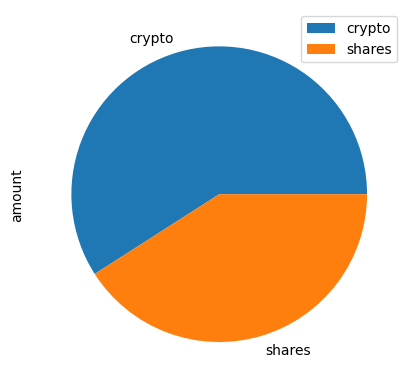

In [29]:
# Plot savings pie chart

df_savings.plot.pie(y="amount")

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [31]:
# Calculate total amount of savings
df_savings = crypto_assets + share_assets
df_savings

98846.6987295

In [32]:
# Validate saving health
if df_savings > emergency_fund:
    print (f"Congratulations, you have enough money in your savings for your retirement")
elif df_savings == emergency_fund:
    print(f" Congratulations on reaching your financial goal")
else:
    print(f"You are short by $ {emergency_fund - df_savings} in reaching your goal")


Congratulations, you have enough money in your savings for your retirement


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set timeframe to "1Day"
timeframe = "1Day"

tickers = ['AGG', 'SPY']

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG

df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [35]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_portfolio[df_portfolio["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_portfolio.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()


AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\mayar\USYD-VIRT-FIN-PT-03-2023-U-LOLC\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999148,1.005966,0.999522,1.009019,1.004955,1.007125,1.008060,1.002538,0.985020,1.006557,...,0.994309,0.997521,0.986437,1.012459,0.998874,0.998967,0.995743,1.002461,0.998788,1.004674
2,0.995672,0.998494,0.999634,1.001910,0.998795,0.998018,1.009018,0.995257,0.989326,1.008362,...,0.992117,0.999907,0.980831,1.009488,1.005516,0.996323,0.998847,1.004901,1.001615,0.992578
3,0.983839,0.996711,0.994576,1.004845,1.000610,1.001228,1.004366,1.000461,0.980781,1.006871,...,0.987980,1.012946,0.982465,1.007526,0.994790,0.989886,1.008316,0.993254,1.010725,0.981456
4,0.985509,1.004147,1.007619,1.003161,1.000274,1.005488,1.012273,1.004124,0.988412,0.992733,...,0.993196,1.019891,0.983041,1.010292,0.991551,0.982772,1.007749,0.999265,1.019723,0.978073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.920307,25.345881,14.107282,6.937842,46.804019,13.522403,19.604448,11.816414,38.027052,6.819270,...,17.140961,10.793952,17.004957,9.459488,5.880185,32.651131,2.963213,26.496281,5.405795,7.308398
7557,14.780535,25.507503,14.195156,6.953037,46.740434,13.518829,19.604753,11.726398,37.640351,6.802053,...,17.185697,10.829946,16.902405,9.455239,5.962288,32.349144,2.981463,26.475356,5.414452,7.323025
7558,14.890388,25.639162,13.950650,6.995623,46.769764,13.578857,19.493106,11.665755,37.716490,6.748313,...,17.258528,10.891143,16.871293,9.408984,5.973951,32.463515,2.978201,26.568433,5.461108,7.330660
7559,15.034739,25.685272,13.848290,7.026568,47.243786,13.584736,19.443377,11.722107,37.811711,6.702285,...,17.146245,10.979029,16.768290,9.400824,6.037112,32.058116,2.975572,26.429767,5.411670,7.300175


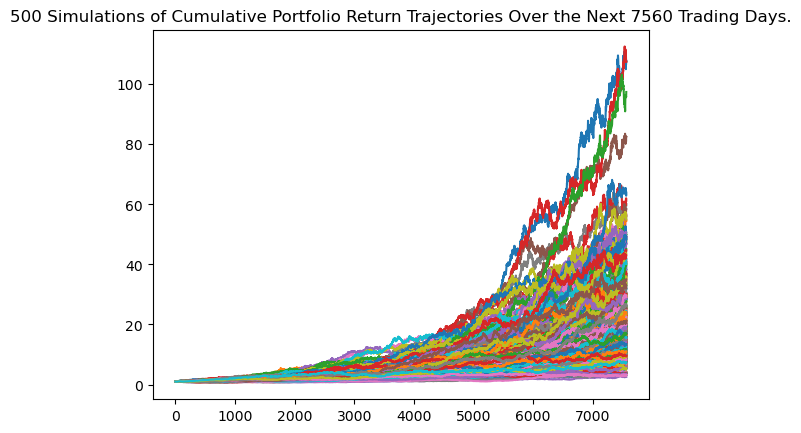

In [38]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

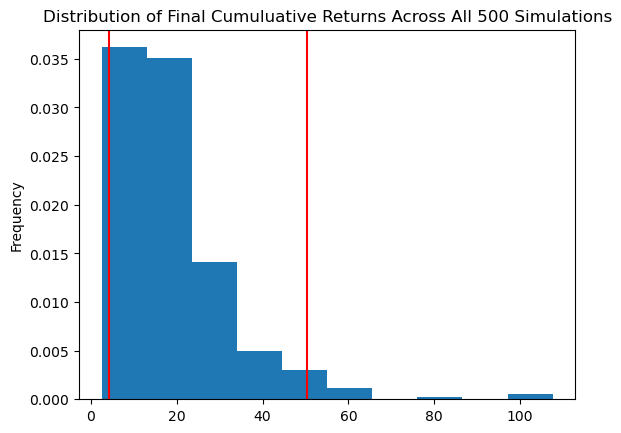

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             18.980463
std              13.248978
min               2.534596
25%              10.600616
50%              15.476121
75%              23.721008
max             107.556442
95% CI Lower      4.266641
95% CI Upper     50.251614
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85332.83 and $1005032.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127999.24 and $1507548.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [0.4,0.6],
    num_simulation = 1260,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()


AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\mayar\USYD-VIRT-FIN-PT-03-2023-U-LOLC\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002578,0.997233,0.999906,0.993095,1.003852,1.008101,1.005236,1.010666,1.003583,0.998409,...,1.002345,0.995740,1.001978,0.995053,1.002965,0.991780,0.988081,0.992139,1.008542,1.003702
2,1.010212,0.995663,0.996151,0.985776,1.008015,1.012708,1.012315,1.006079,1.003925,0.990752,...,1.001264,0.998296,0.997041,1.000323,1.004611,0.987236,0.982029,0.989234,1.004062,1.005183
3,1.013270,0.989214,1.017726,0.986098,1.009213,1.017190,1.006165,1.008137,1.006841,0.997635,...,1.001844,0.997972,0.999766,1.013421,1.016934,0.982905,0.989924,0.985809,1.000863,1.005922
4,1.019731,0.979122,1.015826,0.983482,1.006926,1.021712,1.003375,1.005159,1.015698,0.992965,...,0.997998,1.002258,1.004354,1.022782,1.026843,0.984289,0.992654,0.988186,0.994796,1.003265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.470815,1.453554,1.724722,1.736924,1.889597,2.416187,1.323017,1.349918,2.031736,1.815202,...,1.806961,1.969054,1.095686,1.969872,2.855684,1.522998,2.027626,1.791024,1.894383,1.349564
1257,1.472971,1.455556,1.718999,1.739975,1.908030,2.420024,1.335345,1.348932,2.052582,1.814097,...,1.804256,1.937397,1.097743,1.994528,2.828142,1.520888,2.057642,1.783126,1.903823,1.345771
1258,1.478394,1.450018,1.711757,1.706731,1.891523,2.419398,1.317292,1.359109,2.044628,1.814987,...,1.798960,1.976009,1.095658,1.971797,2.854283,1.509499,2.062406,1.771033,1.897709,1.336935
1259,1.467112,1.440644,1.703200,1.711238,1.896003,2.383426,1.317893,1.351584,2.022523,1.844318,...,1.798720,1.996965,1.099985,1.969026,2.832101,1.503171,2.039493,1.780001,1.894281,1.339694


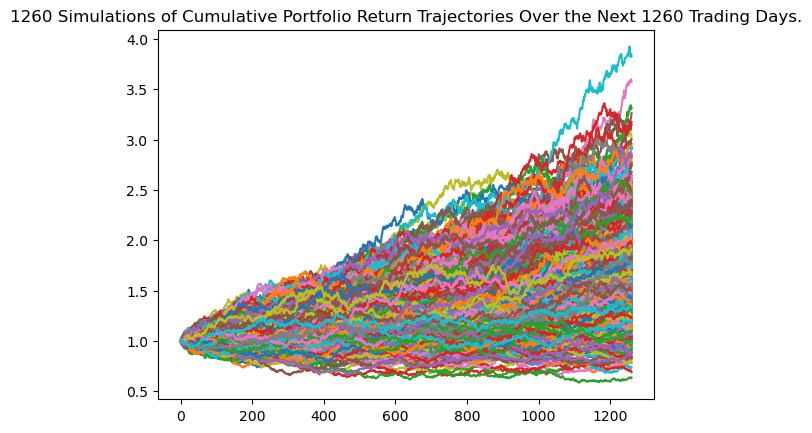

In [45]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

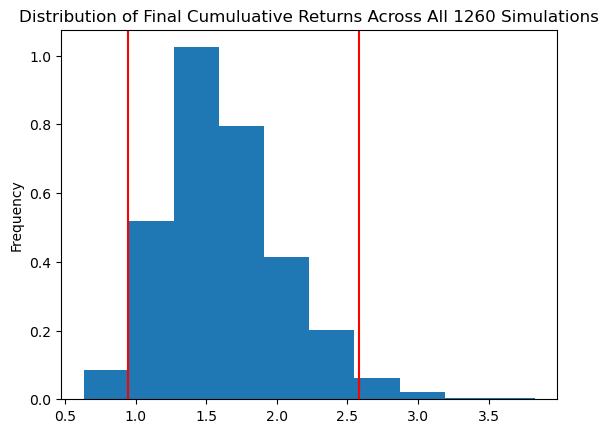

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1260.000000
mean               1.634432
std                0.426242
min                0.634549
25%                1.335824
50%                1.571681
75%                1.876249
max                3.827350
95% CI Lower       0.949041
95% CI Upper       2.585231
Name: 1260, dtype: float64


In [48]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*60000,2)
ci_upper_five = round(even_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56942.45 and $155113.83


### Ten Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [0.4,0.6],
    num_simulation = 2520,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [50]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\mayar\USYD-VIRT-FIN-PT-03-2023-U-LOLC\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016838,0.995121,0.991914,1.006266,0.999436,0.996054,1.000094,1.014681,0.996538,0.994101,...,0.990346,1.002251,0.988048,0.997103,0.995493,0.999344,1.002310,1.011094,0.996780,1.002909
2,1.023763,0.991589,0.994250,1.000840,1.001587,0.989706,1.007386,1.019547,0.989201,0.991696,...,0.980726,1.004333,0.998205,0.992991,0.997217,1.005378,1.003340,1.011624,1.009887,1.000629
3,1.029746,0.982977,0.994721,0.996745,1.007298,0.981024,1.003726,1.010619,0.985444,0.997394,...,0.975088,0.999188,0.992254,0.997789,0.998869,1.003178,1.006407,1.000078,1.020843,0.995041
4,1.037272,0.994036,0.985372,0.990045,1.013052,0.980978,1.002698,1.011442,0.994763,1.002940,...,0.969081,1.007044,1.002948,0.988989,1.004771,0.998345,0.996513,0.987595,1.037080,0.989263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.648636,3.458383,2.295607,3.502029,1.925903,2.615637,1.838995,1.192524,1.706013,3.768865,...,2.298272,3.343401,4.133397,3.636243,3.476415,2.414285,1.854198,2.393579,1.842550,2.878142
2517,2.633856,3.443115,2.304434,3.523404,1.937622,2.613493,1.821076,1.187357,1.706489,3.784982,...,2.282104,3.332751,4.099902,3.642117,3.492240,2.433367,1.886117,2.384242,1.841528,2.880773
2518,2.652026,3.445815,2.317175,3.527300,1.916315,2.631714,1.823165,1.205243,1.709400,3.763442,...,2.261437,3.291237,4.120559,3.634444,3.489070,2.456433,1.896505,2.401816,1.829082,2.880049
2519,2.654865,3.462102,2.308563,3.557619,1.873022,2.611758,1.833390,1.221464,1.696386,3.775128,...,2.271044,3.288814,4.150576,3.642971,3.510157,2.445519,1.884995,2.368020,1.827892,2.881171


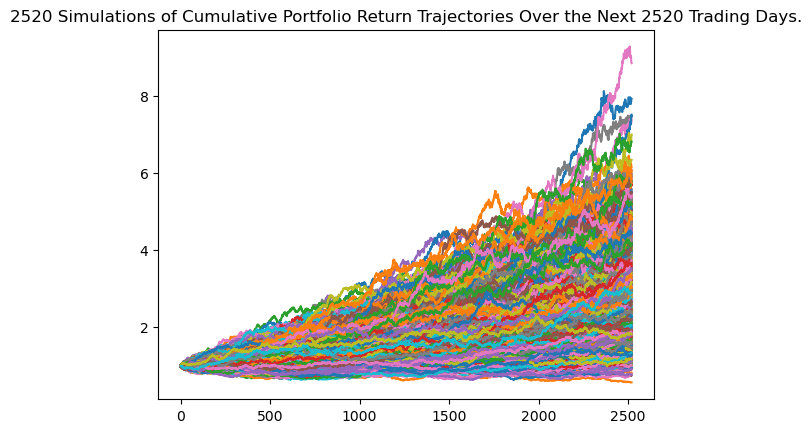

In [51]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

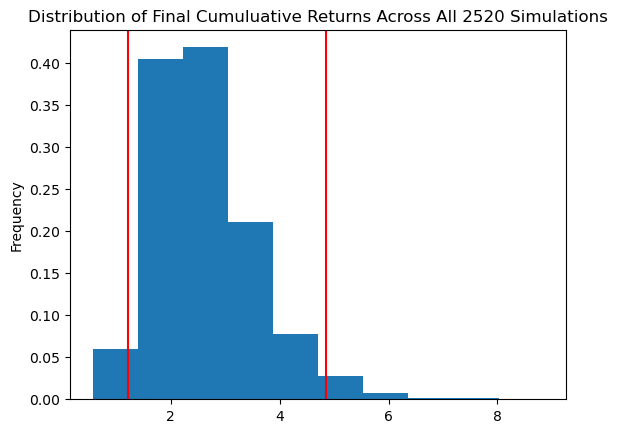

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           2520.000000
mean               2.628700
std                0.940896
min                0.573651
25%                1.978335
50%                2.471600
75%                3.124799
max                8.848699
95% CI Lower       1.221945
95% CI Upper       4.852748
Name: 2520, dtype: float64


In [54]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*60000,2)
ci_upper_ten = round(even_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73316.73 and $291164.89
